In [154]:
import os

from utils.Embedding import get_embeddings
from utils.data_prep import data_clean

path_to_data = "C:\\Users\\PranavBhasin\\Downloads\\dataset\\data.txt"
path_to_label = "C:\\Users\\PranavBhasin\\Downloads\\dataset\\labels.xlsx"

In [155]:
df = data_clean(path_to_data, path_to_label)

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df.rename(columns = {'Category_1':'First Party Collection',
                     'Category_2':'Third Party Sharing'    
                    ,'Category_3':'User Choice'    
                    ,'Category_4':'User Access, Edit and Deletion'     
                    ,'Category_5':'Data Retention'
                    ,'Category_6':'Data Security'
                    ,'Category_7':'Policy Change'
                    ,'Category_8':'Do Not Track & Technology'
                    ,'Category_9':'International &Specic Audiences'}, inplace = True) 


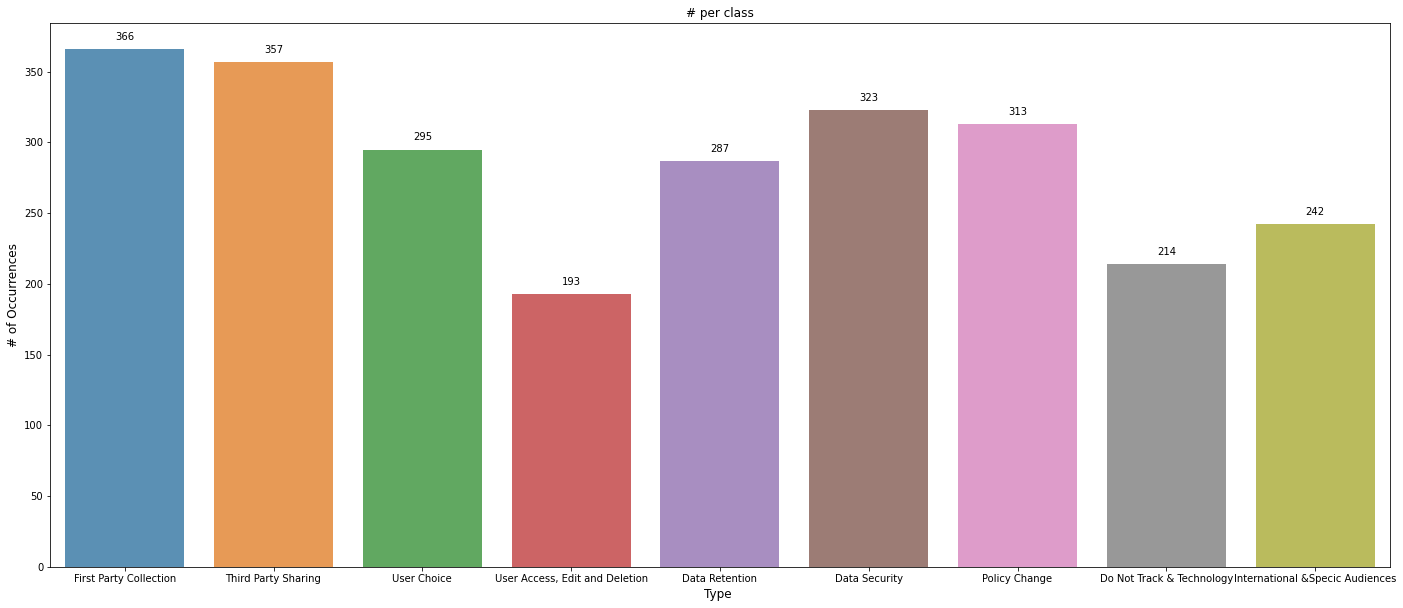

<Figure size 432x288 with 0 Axes>

In [159]:
x=df.iloc[:,1:10].sum()
# x
#plot
plt.figure(figsize=(24,10))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
plt.savefig("distribution-per-class")

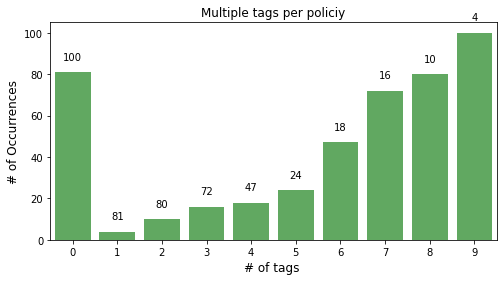

<Figure size 432x288 with 0 Axes>

In [166]:
rowsums=df.iloc[:,1:10].sum(axis=1)
x=rowsums.value_counts()
color = sns.color_palette()
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per policiy")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
plt.savefig("multi-tags-per-comment")

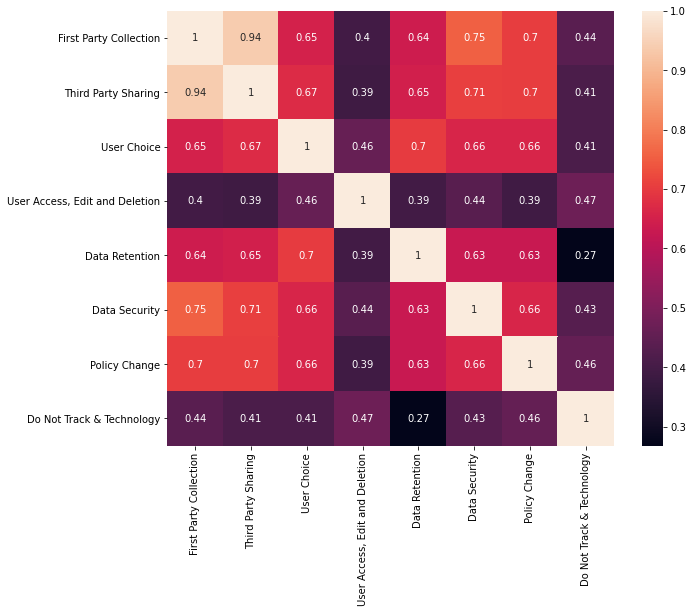

In [150]:
temp_df=df.iloc[:,1:10]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.savefig("correlation heatmap")

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [51]:
import re

In [57]:
df['count_sent']=df["Privacy_Policies"].apply(lambda x: len(re.findall("\.",str(x)))+1)

In [60]:
df['count_letters']=df["Privacy_Policies"].apply(lambda x: len(str(x)))

In [62]:
df['count_word']=df["Privacy_Policies"].apply(lambda x: len(str(x).split()))

In [63]:
df['count_unique_word']=df["Privacy_Policies"].apply(lambda x: len(set(str(x).split())))

In [66]:
df = df.drop(["len"],axis = 1)

In [68]:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']

In [71]:
df = df[['Policy #','Privacy_Policies','First Party Collection', 'Third Party Sharing', 'User Choice',
         'User Access, Edit and Deletion','Data Retention','Data Security','Policy Change', 'Do Not Track & Technology',
       'International &Specic Audiences', 'count_sent','count_letters', 'count_word', 'count_unique_word','word_unique_percent']]

In [102]:
df.head()

,Policy #,Privacy_Policies,First Party Collection,Third Party Sharing,User Choice,"User Access, Edit and Deletion",Data Retention,Data Security,Policy Change,Do Not Track & Technology,International &Specic Audiences,count_sent,count_letters,count_word,count_unique_word,word_unique_percent
0,1,x genomics navigation products products single...,1,1,1,1,1,1,1,1,1,148,19350,2529,920,36.378015
1,2,contact us outside consultants story mission i...,1,1,1,1,1,1,1,1,1,61,8816,1102,585,53.085299
2,3,skip main content caribbean central africa eas...,1,1,1,1,1,1,1,1,1,59,7986,988,480,48.582996
3,4,investors overview financials stock info resou...,1,1,1,1,1,1,1,1,1,79,11218,1417,560,39.520113
4,5,africa algeria south africa sub saharan africa...,1,1,1,1,1,1,1,1,1,176,23018,2933,1076,36.685987


In [77]:
train_feats=df.iloc[:]
#join the tags
train_tags=df.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

In [80]:
train_feats["count_sent"]

,count_sent,count_sent
0,148,148
1,61,61
2,59,59
3,79,79
4,176,176
...,...,...
450,77,77
451,285,285
452,18,18
453,19,19


In [87]:
import pandas as pd
import numpy as np

In [92]:
len(df[df.count_letters != 0])

452

In [101]:
df = df.reset_index(drop=True)

In [106]:
tfv = TfidfVectorizer(min_df=200,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfv.fit(df["Privacy_Policies"])
features = np.array(tfv.get_feature_names())

train_unigrams =  tfv.transform(df["Privacy_Policies"])
# test_unigrams = tfv.transform(df["Privacy_Policies"])

In [113]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

# modified for multilabel milticlass
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    cols=df.columns
    for col in cols:
        ids = df.index[df[col]==1]
#         print(ids)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [114]:
tfidf_top_n_per_lass=top_feats_by_class(train_unigrams,features)


'Category_3':'User Choice'    
                    ,'Category_4':'User Access, Edit and Deletion'     
                    ,'Category_5':'Data Retention'
                    ,'Category_6':'Data Security'
                    ,'Category_7':'Policy Change'
                    ,'Category_8':'Do Not Track & Technology'
                    ,'Category_9':'International &Specic Audiences

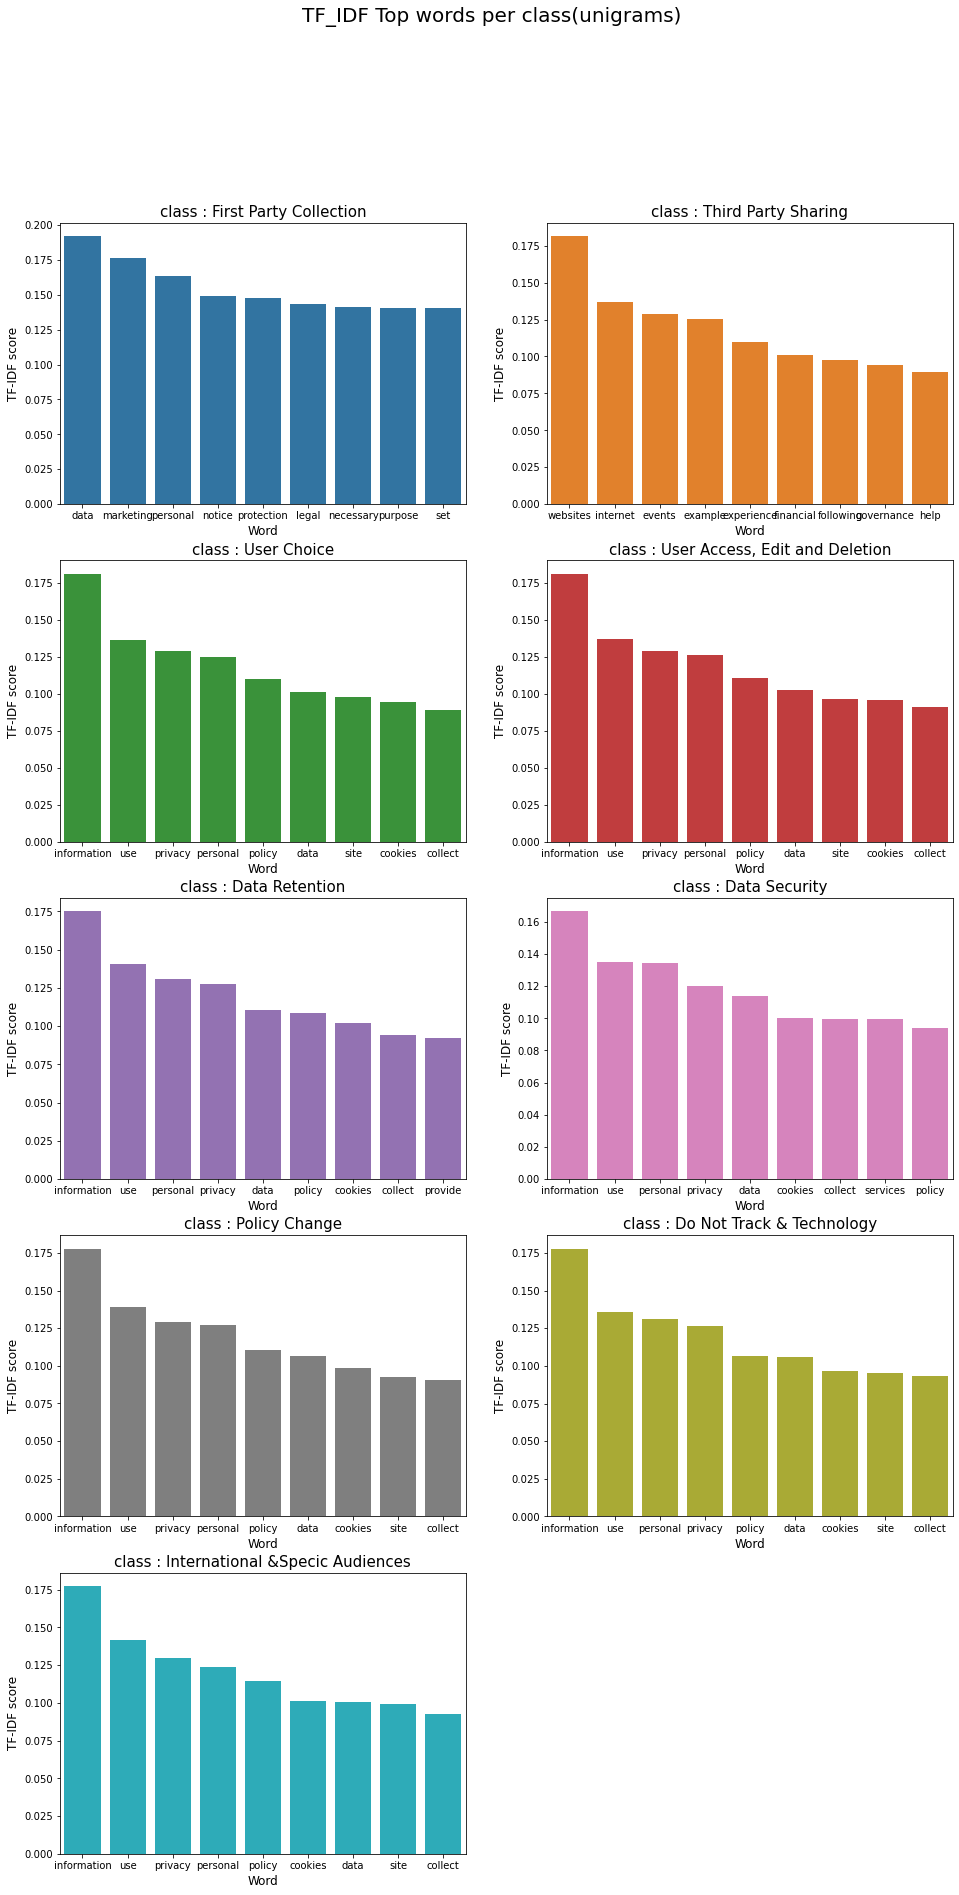

In [165]:
import matplotlib.gridspec as gridspec 

plt.figure(figsize=(16,30))
plt.suptitle("TF_IDF Top words per class(unigrams)",fontsize=20)
gridspec.GridSpec(5,2)
plt.subplot2grid((5,2),(0,0))
sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:9],tfidf_top_n_per_lass[0].tfidf.iloc[0:9],color=color[0])
plt.title("class : First Party Collection",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((5,2),(0,1))
sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:9],tfidf_top_n_per_lass[2].tfidf.iloc[0:9],color=color[1])
plt.title("class : Third Party Sharing",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((5,2),(1,0))
sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:9],tfidf_top_n_per_lass[2].tfidf.iloc[0:9],color=color[2])
plt.title("class : User Choice",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((5,2),(1,1))
sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:9],tfidf_top_n_per_lass[3].tfidf.iloc[0:9],color=color[3])
plt.title("class : User Access, Edit and Deletion",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((5,2),(2,0))
sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:9],tfidf_top_n_per_lass[4].tfidf.iloc[0:9],color=color[4])
plt.title("class : Data Retention",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((5,2),(2,1))
sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:9],tfidf_top_n_per_lass[5].tfidf.iloc[0:9],color=color[6])
plt.title("class : Data Security",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((5,2),(3,0))
sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:9],tfidf_top_n_per_lass[6].tfidf.iloc[0:9],color=color[7])
plt.title("class : Policy Change",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((5,2),(3,1))
sns.barplot(tfidf_top_n_per_lass[7].feature.iloc[0:9],tfidf_top_n_per_lass[7].tfidf.iloc[0:9],color=color[8])
plt.title("class : Do Not Track & Technology",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((5,2),(4,0))
sns.barplot(tfidf_top_n_per_lass[8].feature.iloc[0:9],tfidf_top_n_per_lass[8].tfidf.iloc[0:9],color=color[9])
plt.title("class : International &Specic Audiences",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.savefig("unigram-most-freq")